In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Stock EDA") \
    .master("local") \
    .getOrCreate()

24/10/19 18:29:35 WARN Utils: Your hostname, sathvik-HP-EliteBook-x360-1030-G2 resolves to a loopback address: 127.0.1.1; using 192.168.87.115 instead (on interface wlp58s0)
24/10/19 18:29:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/19 18:29:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
data_pat = "/home/hadoop/Documents/historical_stock_data.csv"
print(data_pat)


/home/hadoop/Documents/historical_stock_data.csv


In [7]:
import pandas as pd
df = pd.read_csv(data_pat)
df_spark = spark.createDataFrame(df)

# Show the PySpark DataFrame
df_spark.show()

+----------+------------------+------------------+------------------+-----------------+------------------+---------+
|      Date|              Open|              High|               Low|            Close|         Adj Close|   Volume|
+----------+------------------+------------------+------------------+-----------------+------------------+---------+
|2019-01-02| 38.72249984741211|39.712501525878906|38.557498931884766|39.47999954223633| 37.75008392333984|148158800|
|2019-01-03|35.994998931884766| 36.43000030517578|              35.5|35.54750061035156| 33.98989486694336|365248800|
|2019-01-04| 36.13249969482422| 37.13750076293945| 35.95000076293945|37.06499862670898| 35.44091033935547|234428400|
|2019-01-07| 37.17499923706055| 37.20750045776367| 36.47499847412109|36.98249816894531| 35.36201477050781|219111200|
|2019-01-08| 37.38999938964844| 37.95500183105469|37.130001068115234|          37.6875|36.036128997802734|164101200|
|2019-01-09|  37.8224983215332| 38.63249969482422|37.40750122070

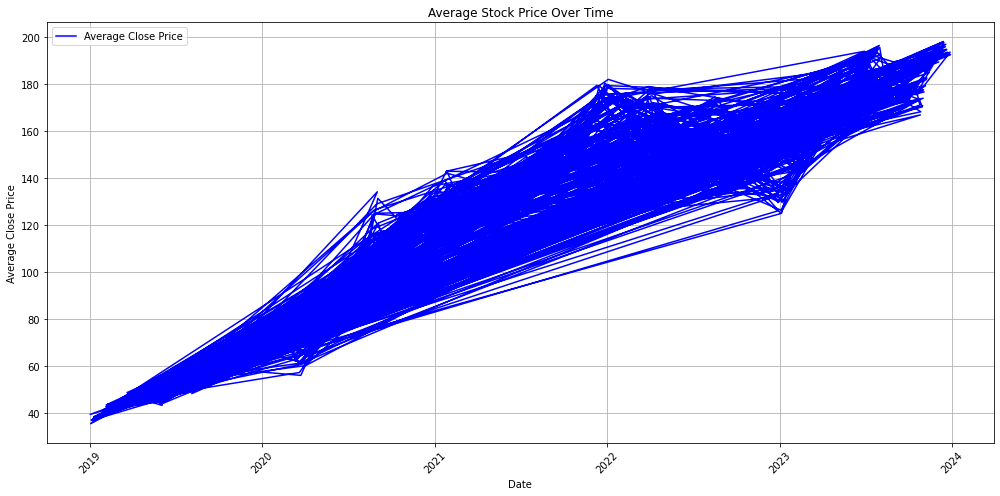

In [8]:
# Convert 'Date' to DateType for time-series analysis
df_spark = df_spark.withColumn("Date", col("Date").cast("date"))

# Group by date and calculate the average stock price for visualization
avg_stock_prices = df_spark.groupBy("Date").agg({"Close": "avg"}).withColumnRenamed("avg(Close)", "Average_Close")

# Convert to Pandas DataFrame for visualization
avg_stock_prices_pd = avg_stock_prices.toPandas()

# Plotting the average stock prices over time
plt.figure(figsize=(14, 7))
plt.plot(avg_stock_prices_pd["Date"], avg_stock_prices_pd["Average_Close"], label='Average Close Price', color='blue')
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [12]:
import matplotlib.pyplot as plt

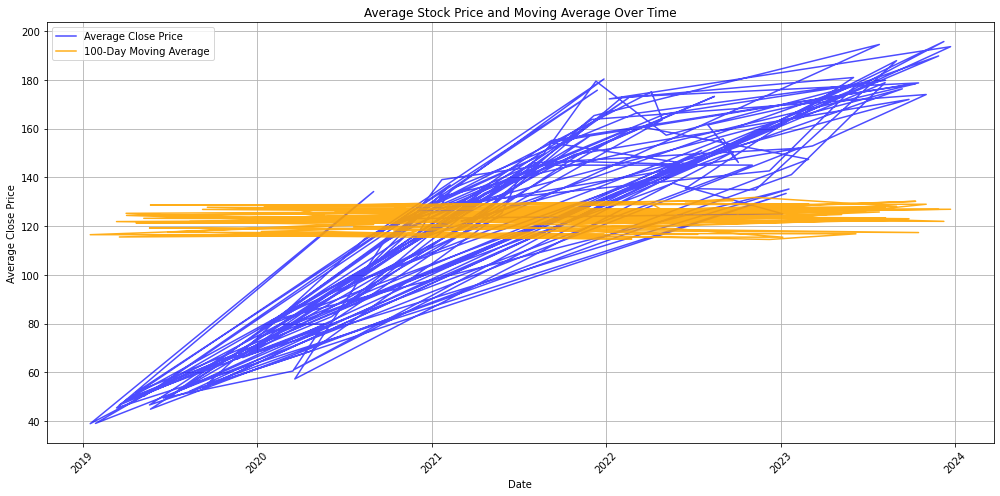

In [14]:
import matplotlib.pyplot as plt

# Adjusting window size for moving average
window_size = 100  # Try a larger window size, such as 50 or 100
avg_stock_prices_pd['Moving_Avg'] = avg_stock_prices_pd['Average_Close'].rolling(window=window_size).mean()

# Optional: Downsample data to avoid clutter (e.g., take every 10th day)
downsampled_data = avg_stock_prices_pd[::10]  # Use every 10th data point

# Plotting the average stock prices with moving averages
plt.figure(figsize=(14, 7))
plt.plot(downsampled_data['Date'], downsampled_data['Average_Close'], label='Average Close Price', color='blue', alpha=0.7)
plt.plot(downsampled_data['Date'], downsampled_data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='orange', alpha=0.9)

# Adding titles and labels
plt.title('Average Stock Price and Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


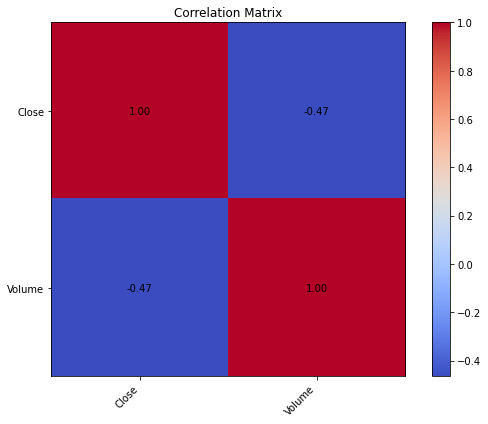

24/10/20 00:01:02 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 17058737 ms exceeds timeout 120000 ms
24/10/20 00:01:02 WARN SparkContext: Killing executors is not supported by current scheduler.
24/10/20 00:01:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for correlation analysis
correlation_data = df_spark.select("Close", "Volume").toPandas()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

# Adding color bar
plt.colorbar()

# Add labels for the matrix
columns = correlation_matrix.columns
plt.xticks(ticks=np.arange(len(columns)), labels=columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(columns)), labels=columns)

# Annotate each cell with the correlation value
for i in range(len(columns)):
    for j in range(len(columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix')

# Show the plot
plt.tight_layout()
plt.show()
